# Analysis of the COVID-19 Data Set published by John Hopkins University Center for Systems Science and Engineering (JHU CSSE)
### The data is collected and distribued daily.
### Anyone can retrieve the full data set from this [GitHub](https://github.com/CSSEGISandData/COVID-19) site.
### The primary data files types are:
* Summary Files (Province/State, Country/Region, Last Update, Confirmed, Deaths, Recovered, Latitude, Longitude)
* Time Series Files (Province/State, Country/Region, Lat, Long, <dates>) for Confirmed, Deaths, and Recovered counts

In [169]:
# Initialization
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib as p
import time as t

# Set this path to the directory where you have cloned the JHU CSSE Data Set
dir_covid_19 = p.PureWindowsPath(r"C:\Users\norma\HDD_Documents\BootCamp\Projects\Project1\CoronaVirus\COVID-19")

# Set this date to the desired Summary Date
study_date = dt.date(2020, 3, 17)

## Summary Data
### Load the Summary File for the Study Date

In [151]:
# Daily Summary Statistics
mmddyyyy_study_date = study_date.strftime("%m-%d-%Y")
daily_report_filename = p.Path(dir_covid_19) / f"csse_covid_19_data/csse_covid_19_daily_reports/{mmddyyyy_study_date}.csv"
type(daily_report_filename)
ss = pd.read_csv(daily_report_filename)

In [152]:
ss[ss['Country/Region'] == 'Italy']

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674


### Aggregate the Counts by Country

In [153]:
# Aggregate the summary data by country
ss_country = pd.pivot_table(ss, values=["Confirmed","Deaths","Recovered"], index="Country/Region", columns=None, aggfunc="sum")
ss_country

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,22,0,1
Albania,55,1,0
Algeria,60,4,12
Andorra,39,0,1
Antigua and Barbuda,1,0,0
...,...,...,...
Uruguay,29,0,0
Uzbekistan,10,0,0
Venezuela,33,0,0


## Time Series Data
### Load a time series of Confirmed case counts
###### (The same logic could be used for Death or Recovered counts.)

In [175]:
# Time Series -- Confirmed
time_series_confirmed_filename = p.Path(dir_covid_19) / "csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
#"C:\Users\norma\HDD_Documents\BootCamp\Projects\Project1\CoronaVirus\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_19-covid-Confirmed.csv"
tsc = pd.read_csv(time_series_confirmed_filename)
tsc_country = pd.pivot_table(tsc, index="Country/Region", aggfunc="sum").drop(columns=["Lat","Long"])
# Transpose the DataFrame, because Pandas likes the dates in the index
tsc_country = tsc_country.T

In [177]:
# Pandas is loading the column headings (now index values), which look like "mm/dd/yy" dates, as strings.
# The string representation of these dates don't sort chronologically.
# Change the string index to Timestamp index, which Pandas will treat as a DateTimeIndex (an index with extra features).
tsc_country.index = [pd.Timestamp(d) for d in tsc_country.index]
# Now sort the DataFrame by the Timestamp index
tsc_country = tsc_country.loc[tsc_country.index.sort_values(),:]
tsc_country

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,occupied Palestinian territory
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,7.0,0.0,4.0,2.0,0.0,0.0,0.0,2.0,0.0


### Align the trends
* Create a DataFrame with Relative Date Counts.
* Remove the leading zero counts, to align the trends to start with the first non-zero value.

In [157]:
# Create an DataFrame full of NaN, to hold relative-day trends of infection for each country
npNaN = np.empty(tsc_country.shape)
npNaN[:] = np.NaN
npNaN.shape
rel_country = pd.DataFrame(npNaN, columns=tsc_country.columns.values)

In [178]:
# Shift the trends up, to start on relative day zero
for (the_column, the_data) in tsc_country.iteritems():
    trend = np.trim_zeros(the_data.to_numpy(),'f')
    rel_country[the_column][0:len(trend)] = trend
    
rel_country

,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,occupied Palestinian territory
0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,2.0,...,1.0,1.0,1.0,4.0,2.0,4.0,1.0,2.0,2.0,NaN
1,1.0,10.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0,...,1.0,1.0,1.0,4.0,2.0,4.0,6.0,10.0,2.0,NaN
2,1.0,12.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,3.0,...,5.0,2.0,1.0,4.0,2.0,8.0,10.0,17.0,2.0,NaN
3,1.0,23.0,1.0,1.0,1.0,2.0,1.0,2.0,6.0,3.0,...,5.0,2.0,1.0,4.0,2.0,29.0,NaN,33.0,2.0,NaN
4,1.0,33.0,1.0,1.0,1.0,8.0,1.0,3.0,9.0,9.0,...,6.0,5.0,1.0,5.0,2.0,NaN,NaN,NaN,2.0,NaN
5,1.0,38.0,1.0,1.0,NaN,12.0,1.0,NaN,9.0,14.0,...,18.0,5.0,1.0,5.0,2.0,NaN,NaN,NaN,2.0,NaN
6,1.0,42.0,3.0,1.0,NaN,12.0,1.0,NaN,12.0,18.0,...,47.0,5.0,1.0,5.0,2.0,NaN,NaN,NaN,2.0,NaN
7,1.0,51.0,5.0,1.0,NaN,17.0,1.0,NaN,12.0,21.0,...,NaN,5.0,1.0,5.0,3.0,NaN,NaN,NaN,2.0,NaN
8,1.0,55.0,12.0,1.0,NaN,19.0,1.0,NaN,12.0,29.0,...,NaN,5.0,1.0,5.0,3.0,NaN,NaN,NaN,2.0,NaN
9,1.0,NaN,12.0,1.0,NaN,19.0,1.0,NaN,13.0,41.0,...,NaN,7.0,1.0,5.0,3.0,NaN,NaN,NaN,6.0,NaN


### Plot the Trend of Confirmed Cases for Selected Countries

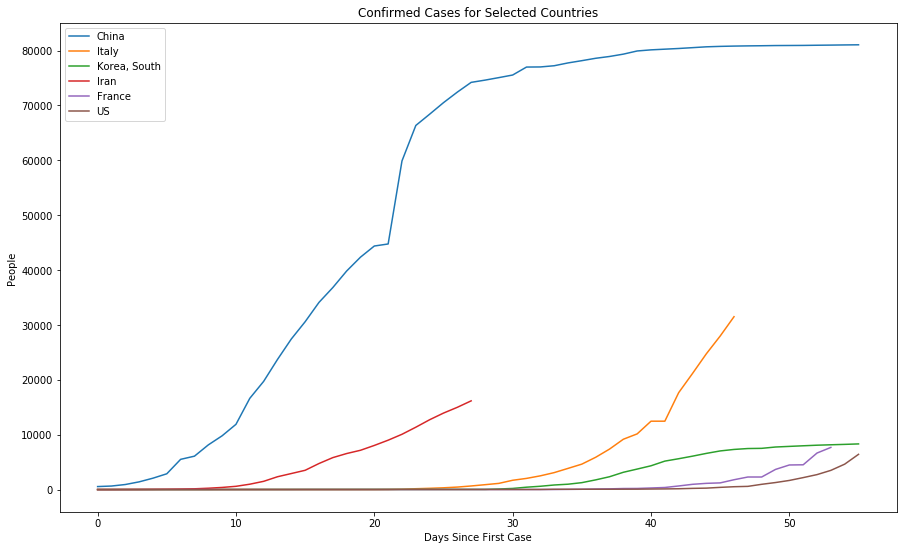

In [184]:
countries_of_interest = ['China','Italy','Korea, South','Iran','France','US']
fig1 = plt.figure(1, figsize=(15,9))
plt.plot(rel_country[countries_of_interest])
plt.legend(countries_of_interest)
plt.title("Confirmed Cases for Selected Countries")
plt.xlabel("Days Since First Case")
plt.savefig("./ConfirmedCasesForSelectedCountries.png")
_ = plt.ylabel("People")
# The "_ = " catches the return value of the last command, so it doesn't distract from the figure

In [181]:
plt.close(fig1)